In [37]:
#import general packages
import numpy as np 
import seaborn as sns


1)Task 1 California Housing Data cleanup


a)Import data

In [38]:
#Import California Housing dataset
import os # so u can interact with operating system,e.g creating folders
import tarfile #deal with compressed file .tar .tar.gz. .tgz
import urllib.request #allow downloading file from web
import pandas as pd # import panda for data working with excel/csv
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #url of the housing data
HOUSING_PATH = os.path.join("datasets", "housing") # create a local folder,for dataset to be saved in datasets/housing
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #full link url to download housing data

#This function creates a folder for the dataset, downloads it and extract all concents in the folder.
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): #if folder does not exist, make folder
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") # where tgz file will be saved
    urllib.request.urlretrieve(housing_url, tgz_path) # download file from housing url and save it to tgz_path
    housing_tgz = tarfile.open(tgz_path) # open the compressed tgz file
    housing_tgz.extractall(path=housing_path) #extract all content in the file
    housing_tgz.close()  # close the file

fetch_housing_data() 

#read the csv file for housing
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


b) Quick Cleaning up data

In [39]:
#Cleaning  up data 
#part 1 general inspection
housing.head() #check first 5 row

housing.info()  #check column info, from this the totalbedrooms seem to have plenty of missing datas
housing.isnull().sum() # counting missing value in each column of data frame, confirmed 207 missing values in bedrooms
 
housing.describe() #quick stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From previous cell, we see that there are missing values in total_bedrooms, so we will remove the rows with the missing values since these rows only contribute to 1% of the total dataset.

In [40]:
# Fix missing values,for the total bedrooms,adopt simplest approaches 
# delete them since 207 out of 20640 is only around 1 percent of total data.
housing.dropna(subset=["total_bedrooms"], inplace=True)

housing.describe() #quick stats again, we can see that the mean,std,etc isn't affected very much




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
housing.drop_duplicates(inplace=True) # remove dupliccated rows
housing.describe() #quick stats again, we can see that there are no duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


part c) looking at data distribution and performing addittional data cleaning, scaling

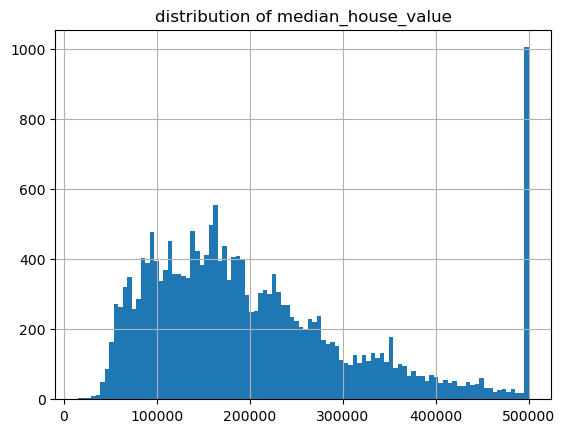

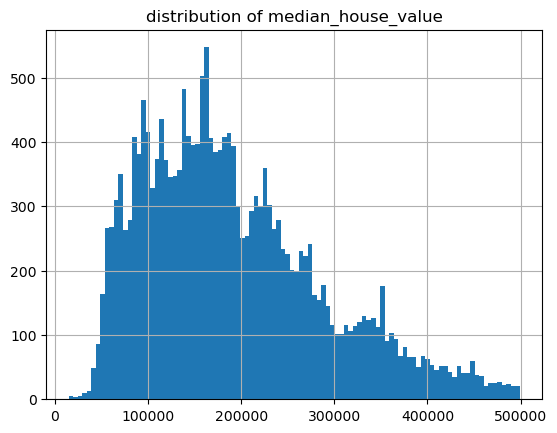

In [42]:
#Looking at outliers and remove them
import matplotlib.pyplot as plt
housing["median_house_value"].hist(bins=100) # it seems like many houses at 500000, 
plt.title("distribution of median_house_value")
plt.savefig("Median_house_value distribution")
plt.figure()


# that 500000 cap is not good for statistical analysis,so remove rows with housing price 500000 and above
# it seems like median value around 500000 is an main mode
housing = housing[housing["median_house_value"] < 500000]#remove housing values bigger than 500000
housing["median_house_value"].hist(bins=100)
plt.title("distribution of median_house_value")
plt.savefig("Median_house_value Histogram after cleanup")




Here we removed values of houses above 500000$, because it is capped at 500000$ and  not removing it would lead to inaccurate prediction around and beyond 500000$.

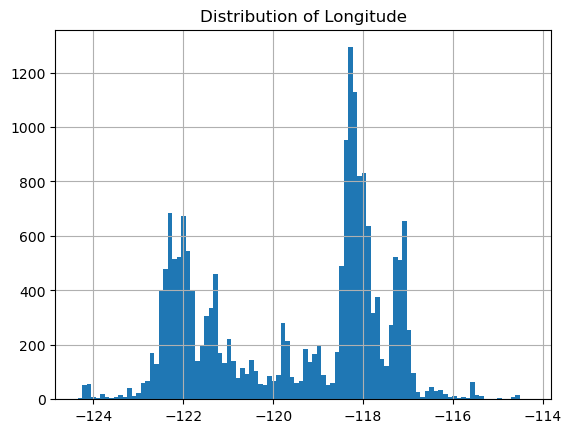

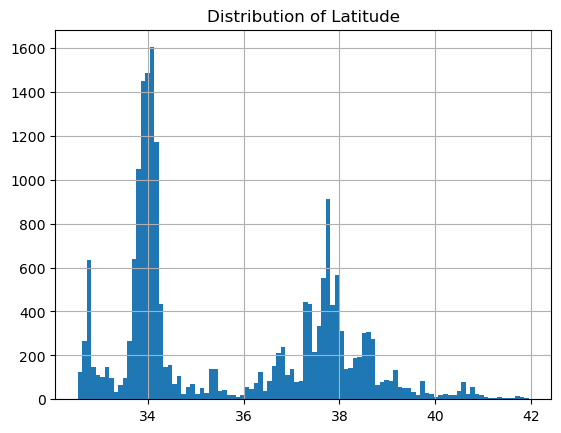

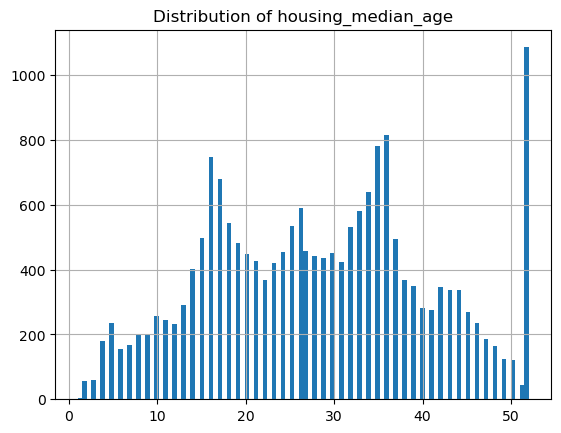

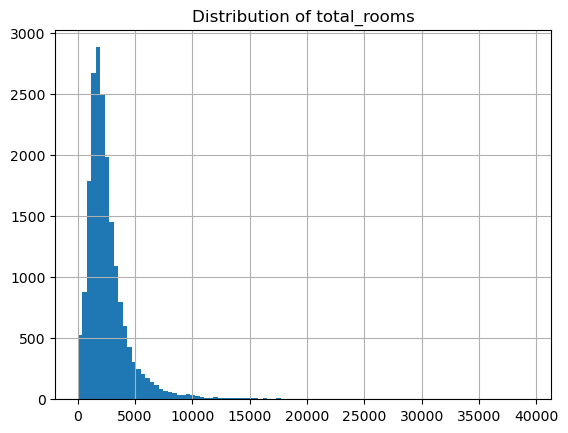

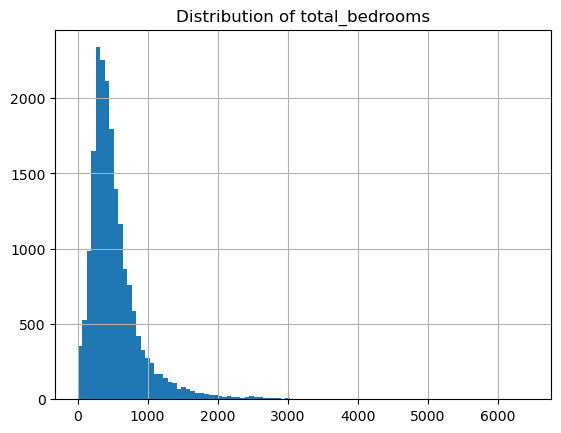

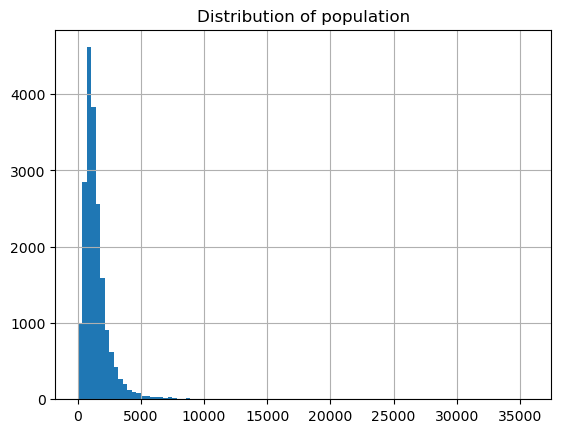

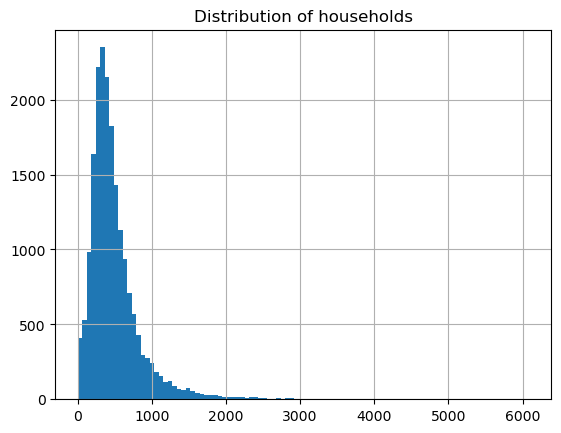

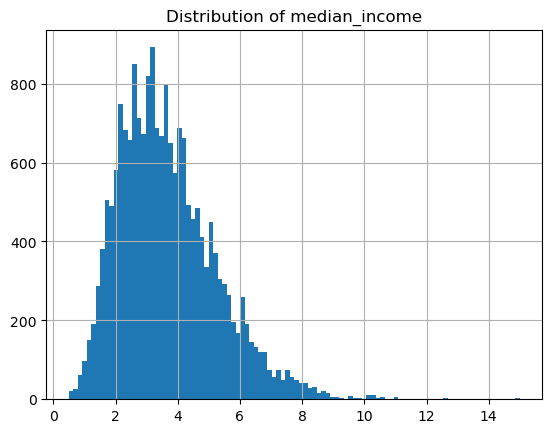

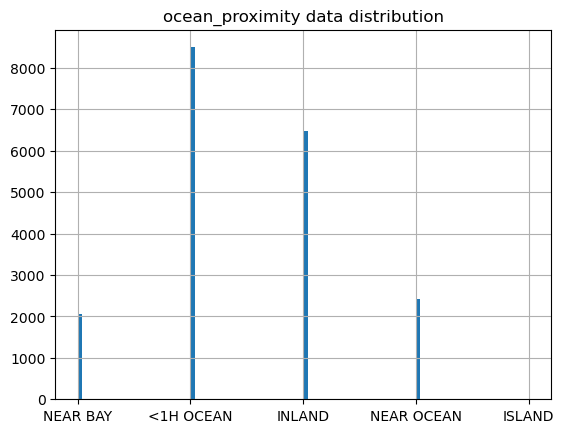

In [43]:
# Continuing look at data distribution
plt.figure()
housing["longitude"].hist(bins=100)
plt.title("Distribution of Longitude")
plt.savefig("longitude distribution")

plt.figure()
housing["latitude"].hist(bins=100)
plt.title("Distribution of Latitude")
plt.savefig("Latitude distribution")

plt.figure()
housing["housing_median_age"].hist(bins=100)
plt.title("Distribution of housing_median_age")
plt.savefig("housing_median_age distribution")

plt.figure()
housing["total_rooms"].hist(bins=100)
plt.title("Distribution of total_rooms")
plt.savefig("total_rooms distribution")

plt.figure()
housing["total_bedrooms"].hist(bins=100)
plt.title("Distribution of total_bedrooms")
plt.savefig("total_bedrooms distribution")

plt.figure()
housing["population"].hist(bins=100)
plt.title("Distribution of population")
plt.savefig("population distribution")

plt.figure()
housing["households"].hist(bins=100)
plt.title("Distribution of households")
plt.savefig("households distribution")

plt.figure()
housing["median_income"].hist(bins=100)
plt.title("Distribution of median_income")
plt.savefig("median_income distribution")

plt.figure()
housing["ocean_proximity"].hist(bins=100)
plt.title("ocean_proximity data distribution")
plt.savefig("ocean_proximity distributio")

Looking at all the data distribution above, only housing age have an issue of capped at 52 year old, so not removing it would affect the age vs value relationship, therefore it is removed.
Out of all the data variables, only ocean_proximity is categorical, we will first discuss distribution of the rest(which are numerical):
Most of the varaibles are distributed close to gaussian(except housing looks a bit heavy tailed,), the longitude, latitude and house age datas concentrated around 2 modes while the rest concentrated around one main mode. 
Note that the housing age is have a cap at 52 lead to a high peak at the right, we would be removing that peak in the next section for
For the ocean proximity:
As expected, the peaks only occurs at 4 different categorizies, the island houses are only 5 in numbers, so its peak is negligible comparing to the other 4 locations.

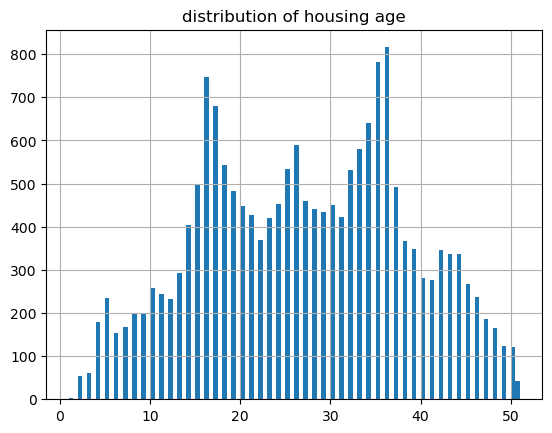

In [44]:
#remove  housingage oldler than 52


housing = housing[housing["housing_median_age"] < 52]#remove housing values bigger than 500000
housing["housing_median_age"].hist(bins=100)
plt.title("distribution of housing age")
plt.savefig("housing_median_age Histogram after cleanup")



After taking a look at eah data distribution independently, we will check the varaible correlations.


(e) Exploring relationships with median house value...


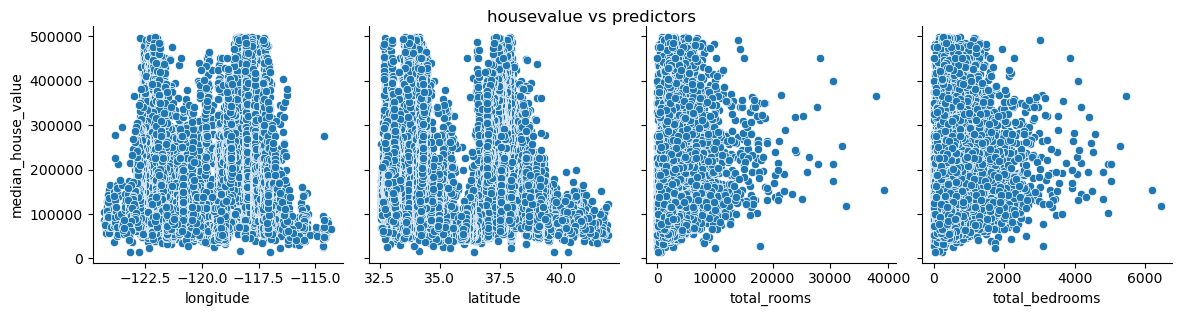

<Figure size 640x480 with 0 Axes>

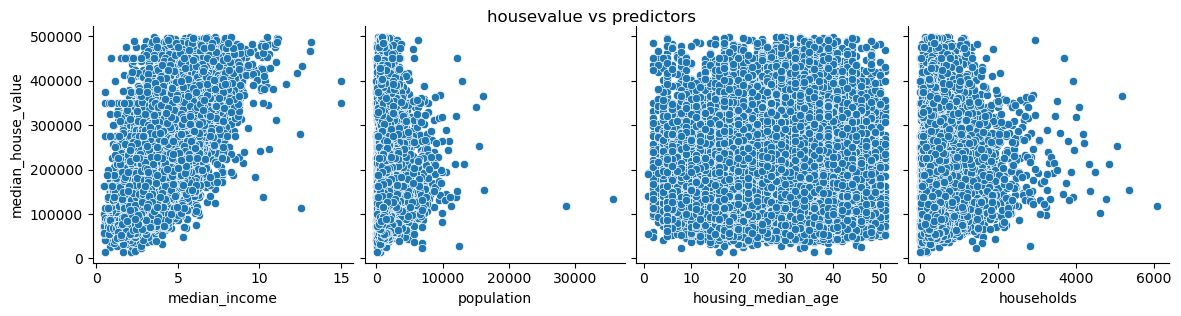

In [45]:
print("\n(e) Exploring relationships with median house value...")

# Scatterplots: mpg vs other quantitative predictors
sns.pairplot(housing, x_vars=["longitude","latitude","total_rooms","total_bedrooms"], y_vars="median_house_value", height=3, aspect=1, kind="scatter")
plt.suptitle("housevalue vs predictors", y=1.02)
plt.show()

plt.figure()
sns.pairplot(housing, x_vars=["median_income","population","housing_median_age","households",], y_vars="median_house_value", height=3, aspect=1, kind="scatter")
plt.suptitle("housevalue vs predictors", y=1.02)
plt.show()

From looking at the relationship above, one can see that the shapes of the households number, total rooms, total bedrooms and populations exhibit similar trend. This suggests that variables are highly correlated as more pouplation often means more construction of houses that generally implies more total rooms and more total bedrooms. We can say that all of these 4 variables says about the housing density at a geographic coordinates.
We will perform a correlation test between the 4 variables to validfy the previous statement.


In [46]:
# Select the 3 variables
subset = housing[["total_rooms", "total_bedrooms", "households","population"]]

# Correlation matrix (Pearson by default)
corr_matrix = subset.corr()
print(corr_matrix)

                total_rooms  total_bedrooms  households  population
total_rooms        1.000000        0.935415    0.922493    0.860279
total_bedrooms     0.935415        1.000000    0.978815    0.880314
households         0.922493        0.978815    1.000000    0.910656
population         0.860279        0.880314    0.910656    1.000000


As one can see, the values are all near 1 with lowest 0.86(still suggesting a very strong correlation), indicating high positive correlation. For prediction purpose, we can then use only one of 4 variable. As a choice,total rooms are chosen.
Now, let's check other variables, from plots above, it seems like the housing age and the value is ill-correlated.

In [47]:
# Select the 2 variables
subset = housing[["housing_median_age","median_house_value"]]

# Correlation matrix (Pearson by default)
corr_matrix = subset.corr()
print(corr_matrix)

                    housing_median_age  median_house_value
housing_median_age            1.000000            0.014647
median_house_value            0.014647            1.000000


Correlations are low, and from the graph, there isn't even a rough trend of age vs value, mainly looks like uniformly spreaded out points.
It would be reasonable to removed, but we would keep it first to see if the model performs well even by keeping it.
Thus, we will remove varaibles, households, population, total_bedrooms.
The 5 predictors left are latitude,longitude,housing age,median income and total rooms.



In [48]:
housing_dropped=housing.drop(['total_bedrooms', 'households','population'], axis=1) # drop these 3 rows



But we haven't dealt with the categorical predictors yet, let's first look at its relationship with values of housing:


<Figure size 640x480 with 0 Axes>

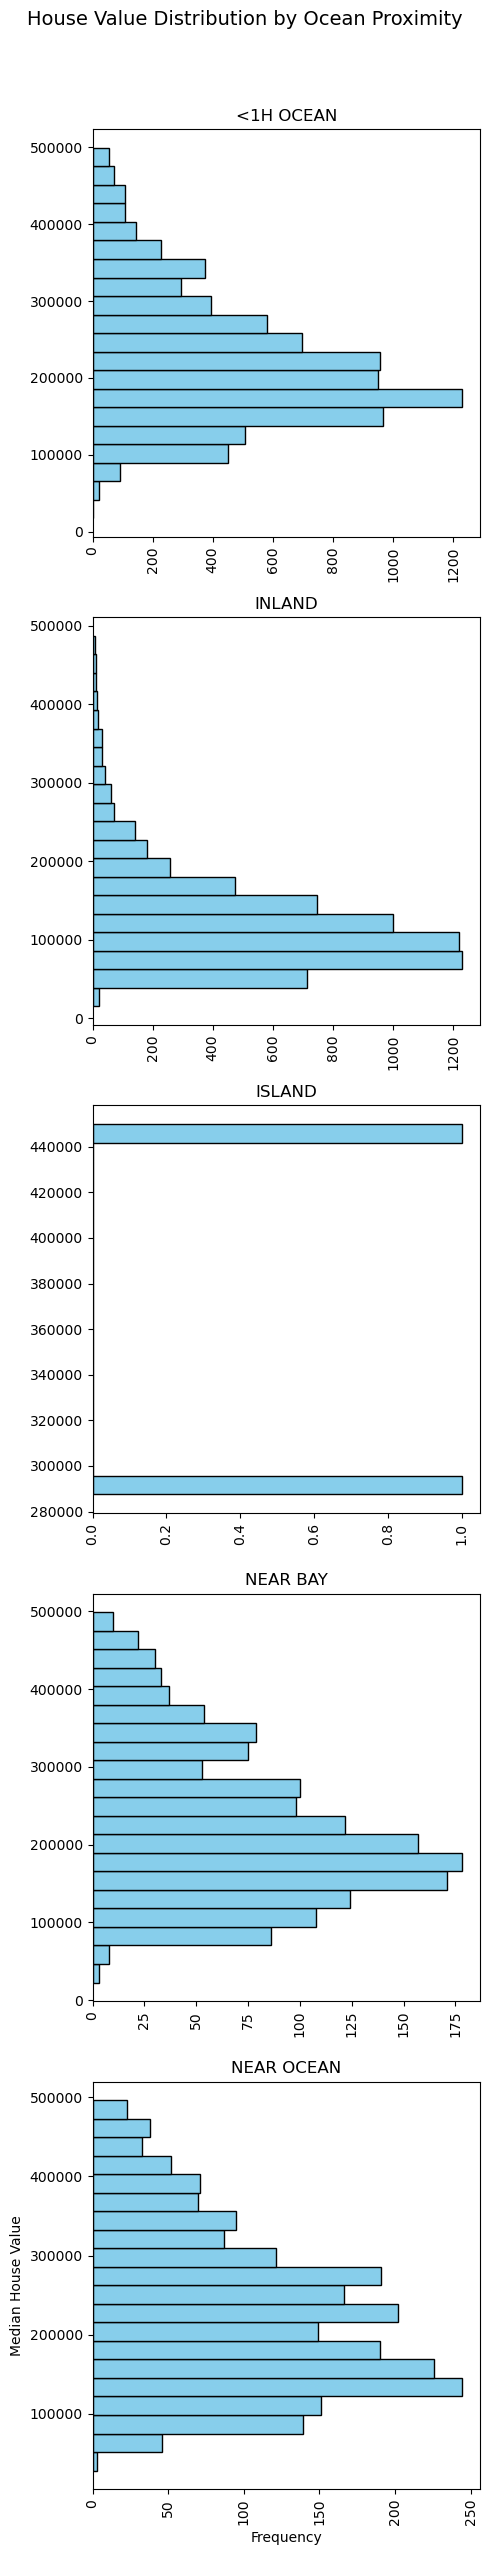

In [49]:
plt.figure()
housing.hist(column="median_house_value", by="ocean_proximity",
          bins=20, figsize=(5,25), layout=(len(housing["ocean_proximity"].unique()), 1),
          orientation="horizontal", color="skyblue", edgecolor="black")

plt.suptitle("House Value Distribution by Ocean Proximity", y=1.02, fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

By looking at the ocean proximity, we can see that houses that are closer to ocean generally have more expensive housing (near ocean, <1 hr to ocean and near bay), all concentrated around 200000. While the inland is concentrated around 100000. And island house all seems to be expensive with cheapest 300000+, but there is too little island samples so it would insufficient to make a judgement on the island location vs value of housing.
We can split this categorical predictor into 5 0/1 numerical predictors, where the 5 varaibles are "NEAR_OCEAN", "NEAR_BAY","ISLAND","INLAND","<1H OCEAN". For example, if "NEAR_OCEAN"=True, the variable would be 1 and the rest of them would be zero.

In [ ]:
#
housing_encoded = pd.get_dummies(housing_dropped, columns=["ocean_proximity"])
#using get dummies(Each variable is converted in as many 0/1 variables as there are different values.)

housing_encoded
#In the end, 6 pure numerical variables with 5 0/1 variables

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,False,False,False,True,False
8,-122.26,37.84,42.0,2555.0,2.0804,226700.0,False,False,False,True,False
15,-122.26,37.85,50.0,1120.0,2.1250,140000.0,False,False,False,True,False
18,-122.26,37.84,50.0,2239.0,1.9911,158700.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,1.8672,84700.0,False,True,False,False,False
